In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Read the file
data=pd.read_csv("reviews.txt",error_bad_lines=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_23448\394293197.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("reviews.txt",error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [3]:
data

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
data=pd.DataFrame(data)


In [6]:
data

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [7]:
#Sentiment analysis
afinn = pd.read_csv(r'C:\Users\HP\Desktop\Python\Assignment\Text Mining\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [10]:
data = [x.strip() for x in data.x]#removing blank spaces
data = [x for x in data if x]#removing black lines

In [12]:
data

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [13]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:15]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unles

In [14]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df


,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [15]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the        107
to          80
and         77
I           70
is          67
it          60
for         58
a           50
in          43
of          43
this        37
on          36
you         33
not         31
was         27
with        26
are         25
have        24
my          20
i           20
that        20
be          19
The         19
good        18
apple       18
or          17
from        16
can         15
product     14
service     14
if          14
laptop      14
as          14
will        13
which       13
am          11
an          11
no          11
working     11
at          11
but         10
MacBook     10
just        10
-           10
after       10
want         9
they         9
its          9
need         9
would        9
dtype: int64

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [19]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [20]:
sent_df

,sentence,sentence1,clean
0,It's amazing..... battery last around 10 -12 h...,It's amazing..... battery last around 10 -12 h...,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.,Got 50k Diwali sale.,Got 50k Diwali sale.
2,Technically good laptop.Good News.luxury produ...,Technically good laptop.Good News.luxury produ...,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.,Terrific sense possession & pride.Bad News.,Terrific sense possession pride.Bad News.
4,Problems will be there if you are switching fr...,Problems switching windows based system - less...,Problems switching windows based system less s...
...,...,...,...
182,You can get one of the best movie experiences ...,You get one best movie experiences .,You get one best movie experiences
183,Overall I would it a 4.5/5.,Overall I would 4.5/5.,Overall I would 4.5/5.
184,"I got a great deal on this laptop, which I hav...","I got great deal laptop, I using almost year now.","I got great deal laptop, I using almost year now."
185,I got it not only on discount but also was abl...,I got discount also able exchange old laptop t...,I got discount also able exchange old laptop t...


In [21]:
sent_df=sent_df.drop('sentence',axis=1)

In [22]:
sent_df=sent_df.drop('sentence1',axis=1)

In [23]:
sent_df

,clean
0,It's amazing..... battery last around 10 -12 h...
1,Got 50k Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense possession pride.Bad News.
4,Problems switching windows based system less s...
...,...
182,You get one best movie experiences
183,Overall I would 4.5/5.
184,"I got great deal laptop, I using almost year now."
185,I got discount also able exchange old laptop t...


In [24]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [25]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [26]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [28]:
sent_df['sentiment_value']

0       7
1       0
2       6
3       4
4     -10
       ..
182     3
183     0
184     3
185     0
186     3
Name: sentiment_value, Length: 187, dtype: int64

In [29]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    14
1     4
2    26
3     5
4    42
5     4
6    30
7    10
8    13
9    13
Name: word_count, dtype: int64

In [30]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
4,Problems switching windows based system less s...,-10,42
148,This worst apple product I ever seen ...6 mont...,-8,48
89,"?, god damn apple (Though bad, seen GeForce 94...",-6,29
175,The device never accidental drop shock I using...,-5,9
131,"From past 1 week I able turn mac, went apple s...",-4,28
121,Requires power input restart again.Contacted s...,-4,16
68,They told motherboard dead buy new motherboard.,-3,7
156,Terrible product sold Amazon The rating Apple'...,-3,8
167,"When received, within 15 days realised hinges ...",-3,8
49,I stuck dead mac using 10days.,-3,6


In [31]:
sent_df['sentiment_value'].describe() #Here the max sentiment value is 13 and min value is -4

count    187.000000
mean       0.946524
std        3.332364
min      -10.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [32]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
1,Got 50k Diwali sale.,0,4
4,Problems switching windows based system less s...,-10,42
5,"), printers compatible (e.g.",0,4
7,need spend extra external CD writer tp buy car...,0,10
10,"Marketing strategy Indian market, planned, bad.",-3,6
...,...,...,...
176,The service center guy told would cost around ...,0,11
177,"Now I'm left option.If buying, I suggest buy a...",0,13
180,"The design, user friendliness, compactness eas...",0,8
183,Overall I would 4.5/5.,0,4


In [33]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,14
2,Technically good laptop.Good News.luxury produ...,6,26
3,Terrific sense possession pride.Bad News.,4,5
6,economical MFD laser printer RICOH SP 111 can'...,1,30
8,Mac con connected projectors unless buy connec...,2,13
...,...,...,...
179,great product The elegant work apple seen prod...,5,8
181,"Coming performance, speed remarkable, get know...",2,12
182,You get one best movie experiences,3,6
184,"I got great deal laptop, I using almost year now.",3,10


In [34]:
sent_df['index']=range(0,len(sent_df))

In [35]:
sent_df

,clean,sentiment_value,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,14,0
1,Got 50k Diwali sale.,0,4,1
2,Technically good laptop.Good News.luxury produ...,6,26,2
3,Terrific sense possession pride.Bad News.,4,5,3
4,Problems switching windows based system less s...,-10,42,4
...,...,...,...,...
182,You get one best movie experiences,3,6,182
183,Overall I would 4.5/5.,0,4,183
184,"I got great deal laptop, I using almost year now.",3,10,184
185,I got discount also able exchange old laptop t...,0,9,185


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

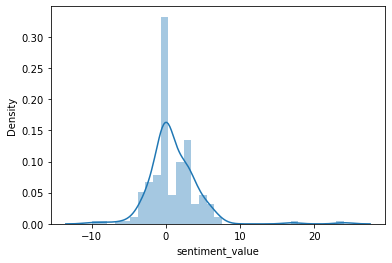

In [36]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

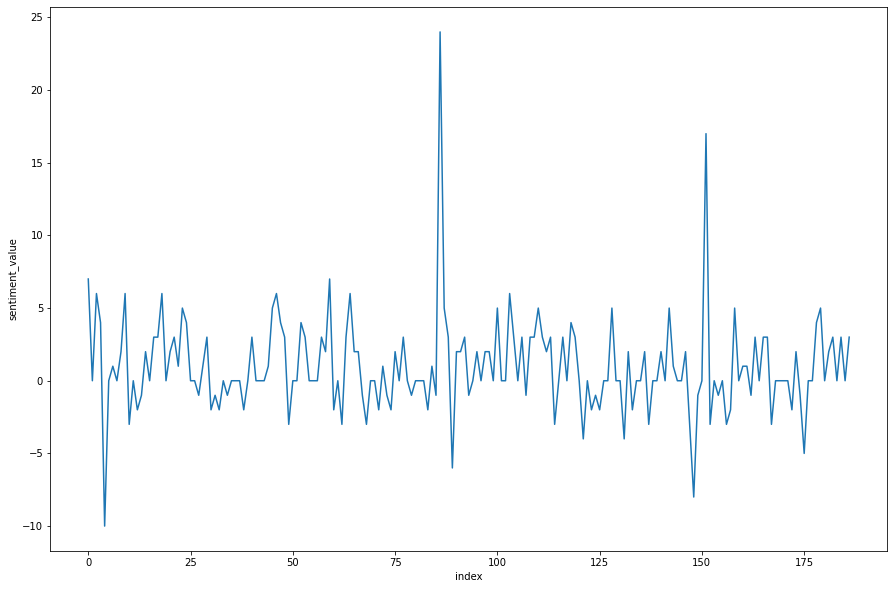

In [37]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

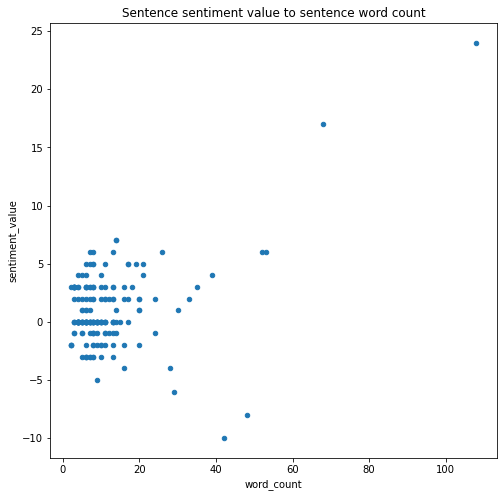

In [38]:

#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

 ####  Generate wordcloud

In [39]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [43]:
# Joining the list into one string/text
text = ' '.join(data)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

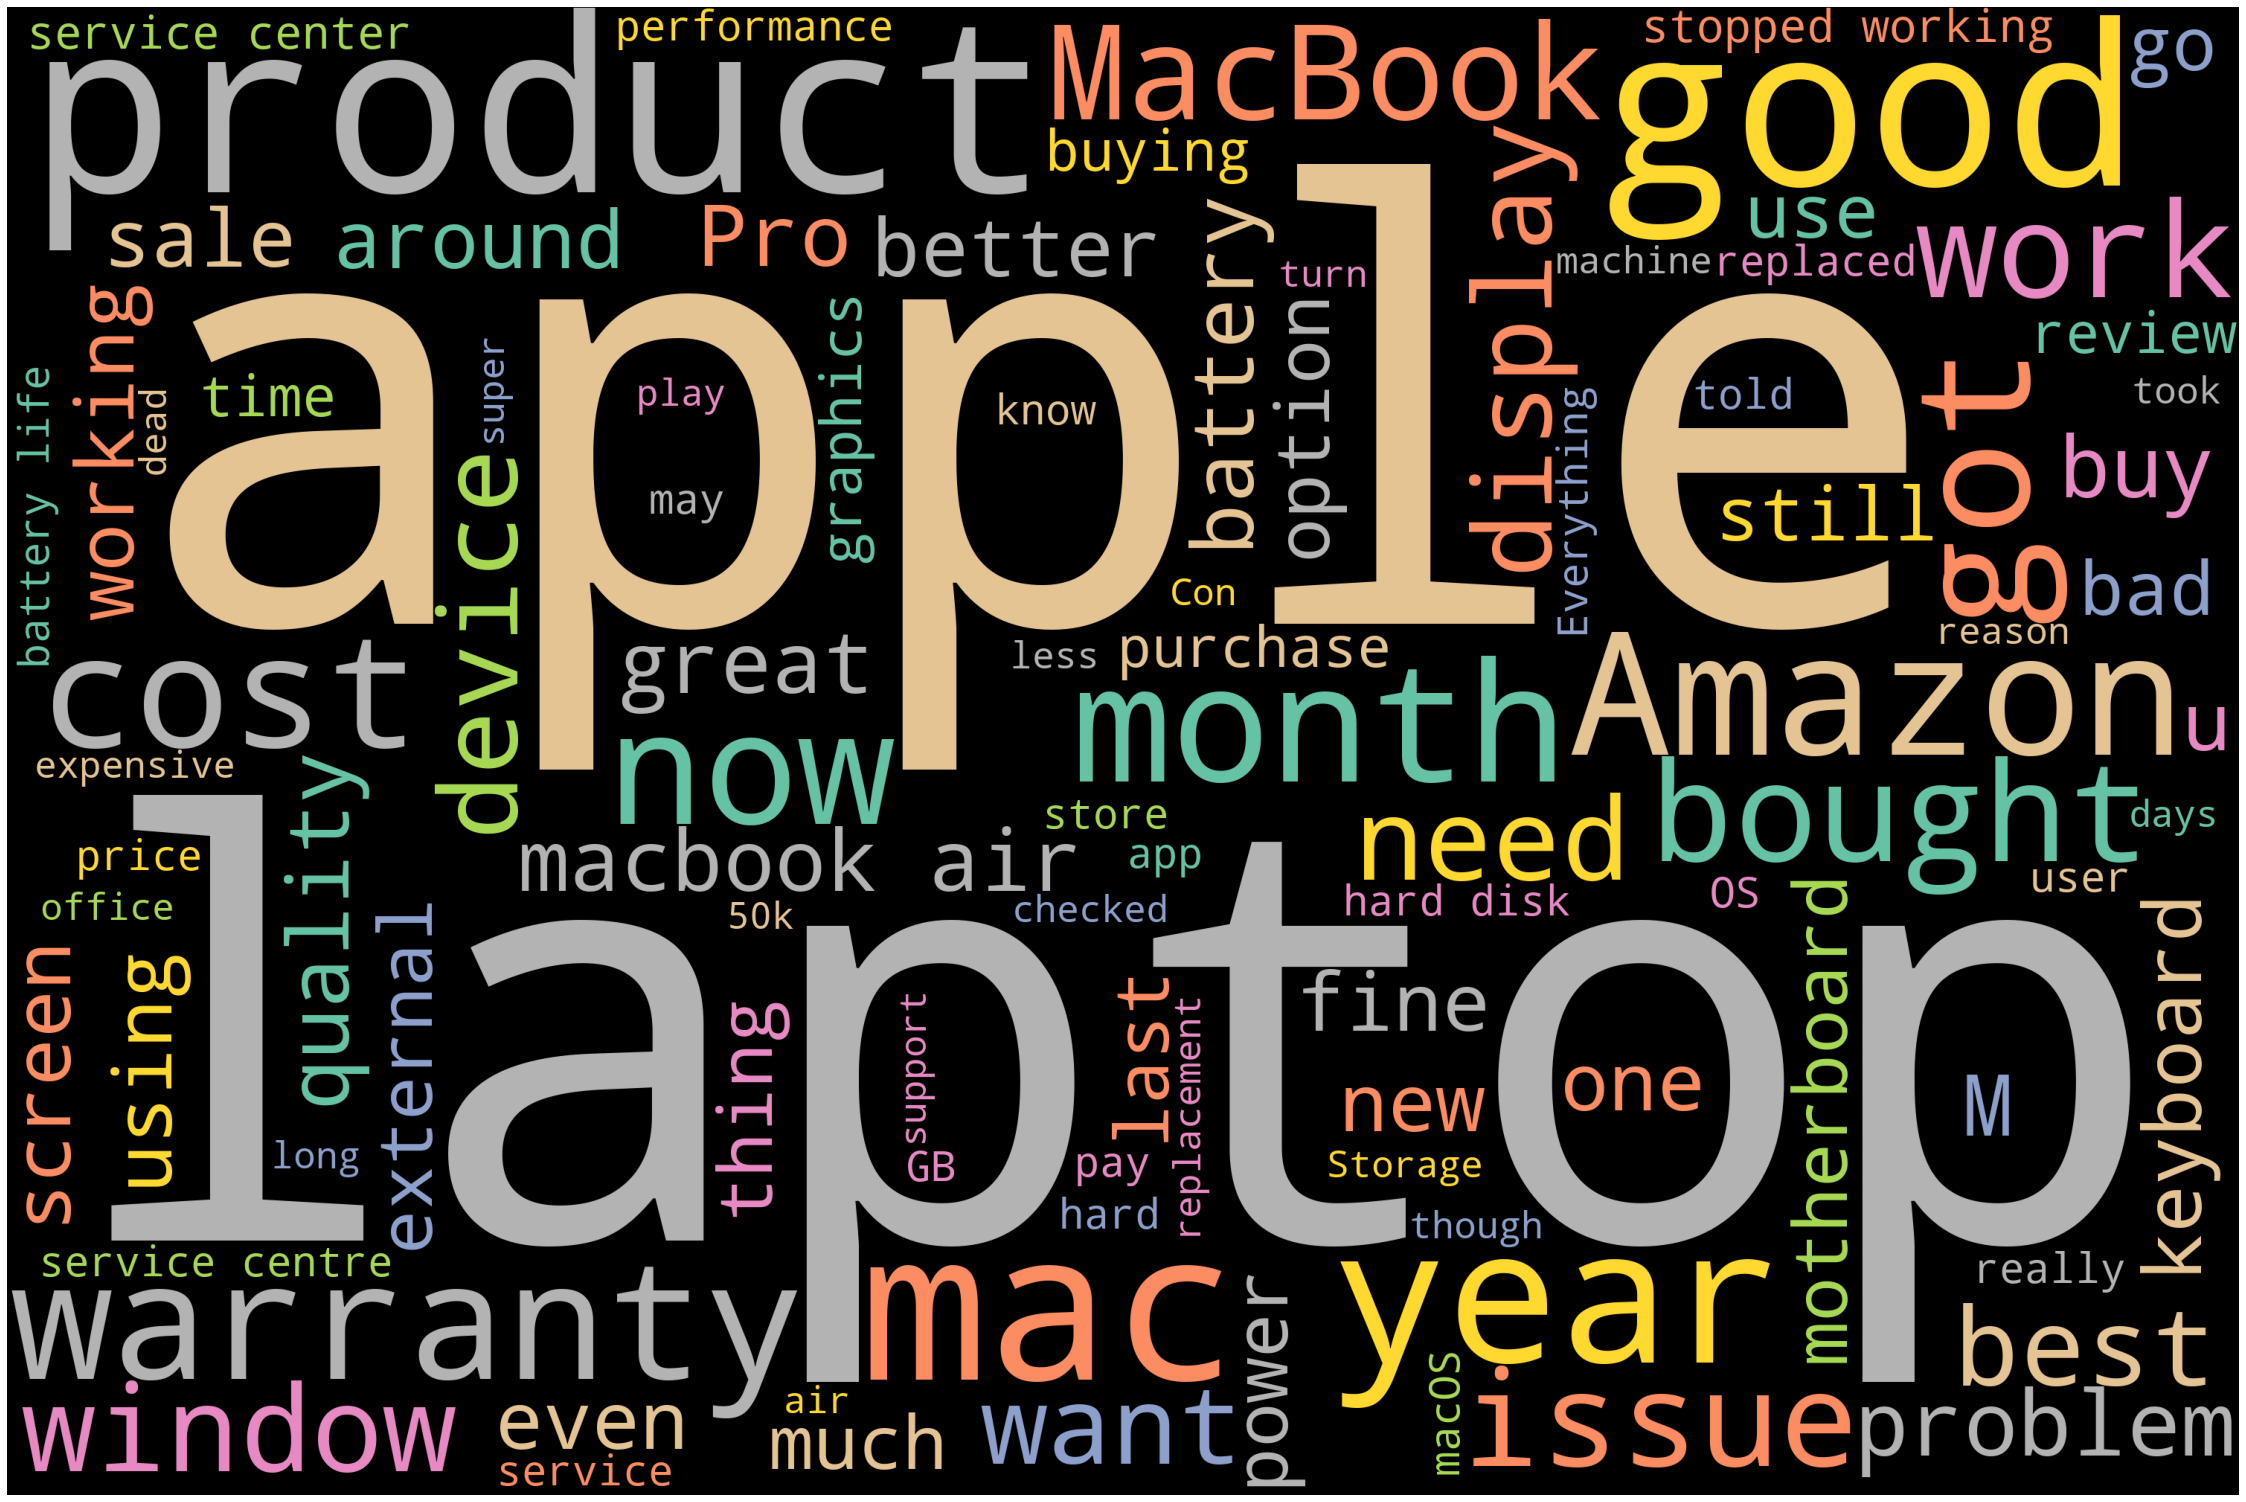

In [44]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [45]:
# Save image
#wordcloud.to_file("wordcloud.png")

#### Here most of the reviews are neutral still negative reviews very less comparing to the postive.So from overall reviews we can conclude that its a good product